(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 784)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
118/118 [==============================] - 2s 5ms/step - loss: 0.5903 - accuracy: 0.8315
Epoch 2/10
118/118 

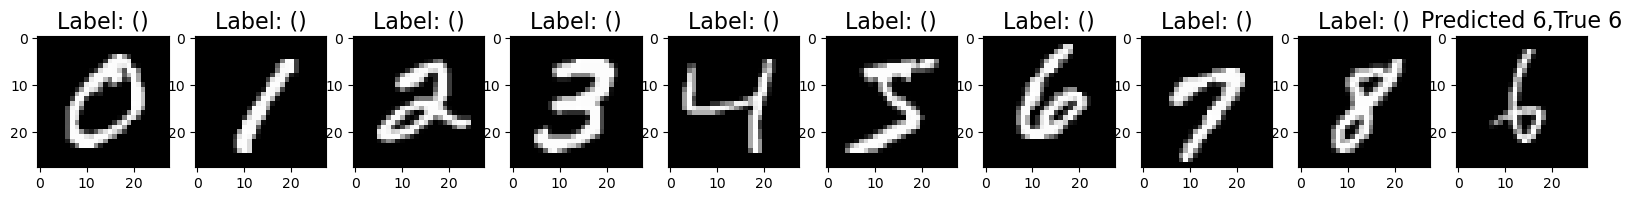

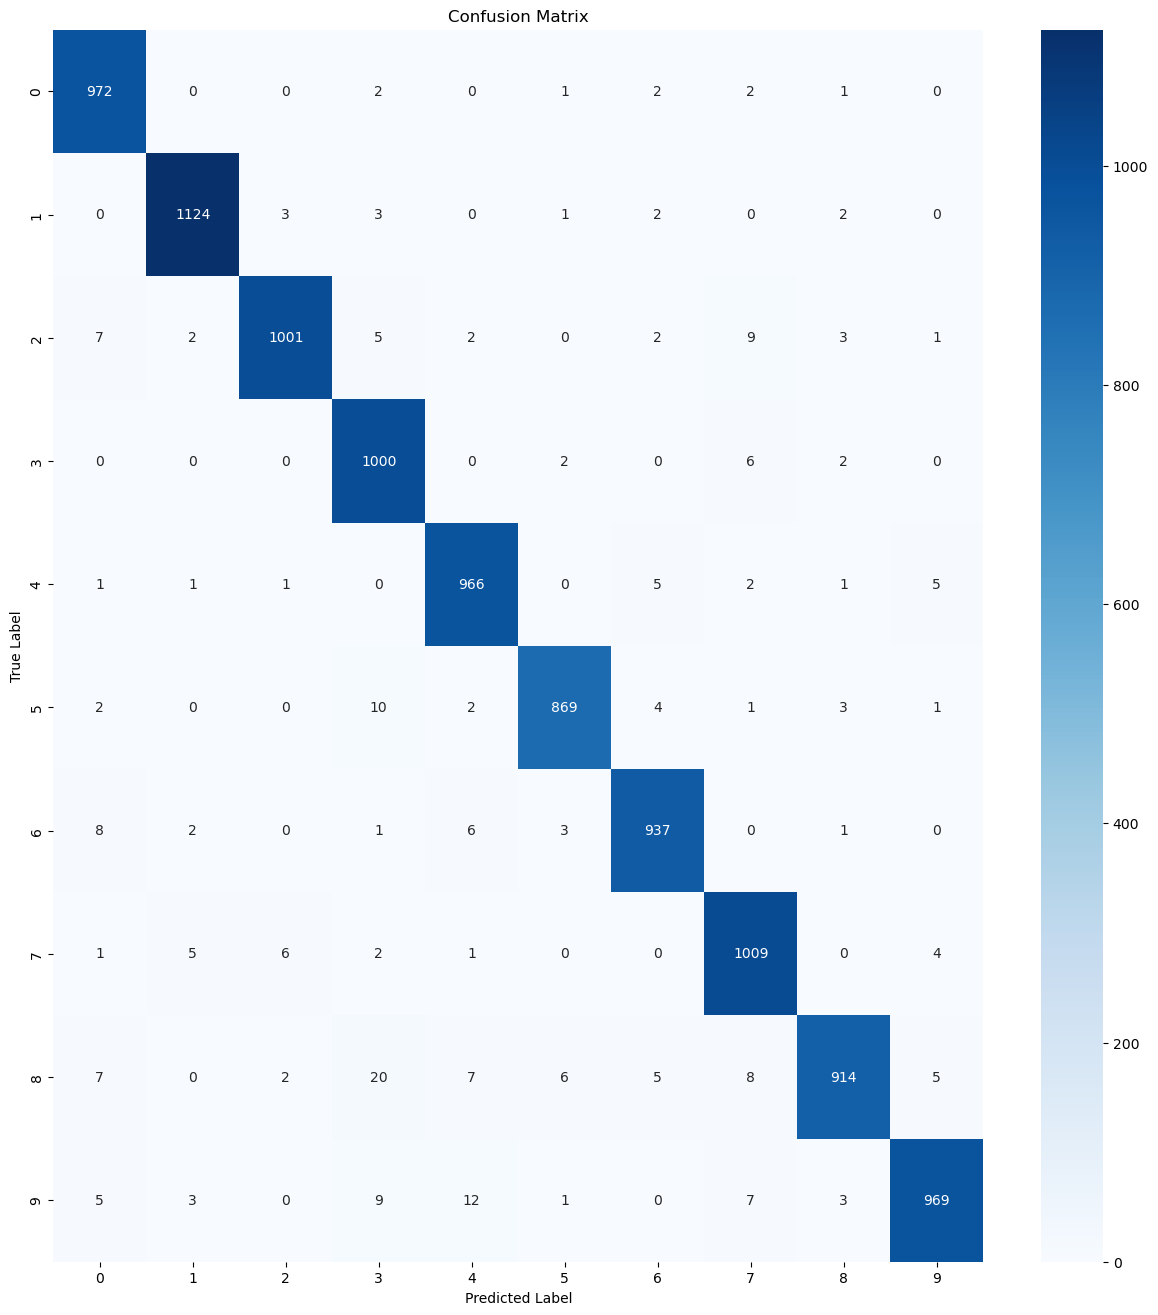

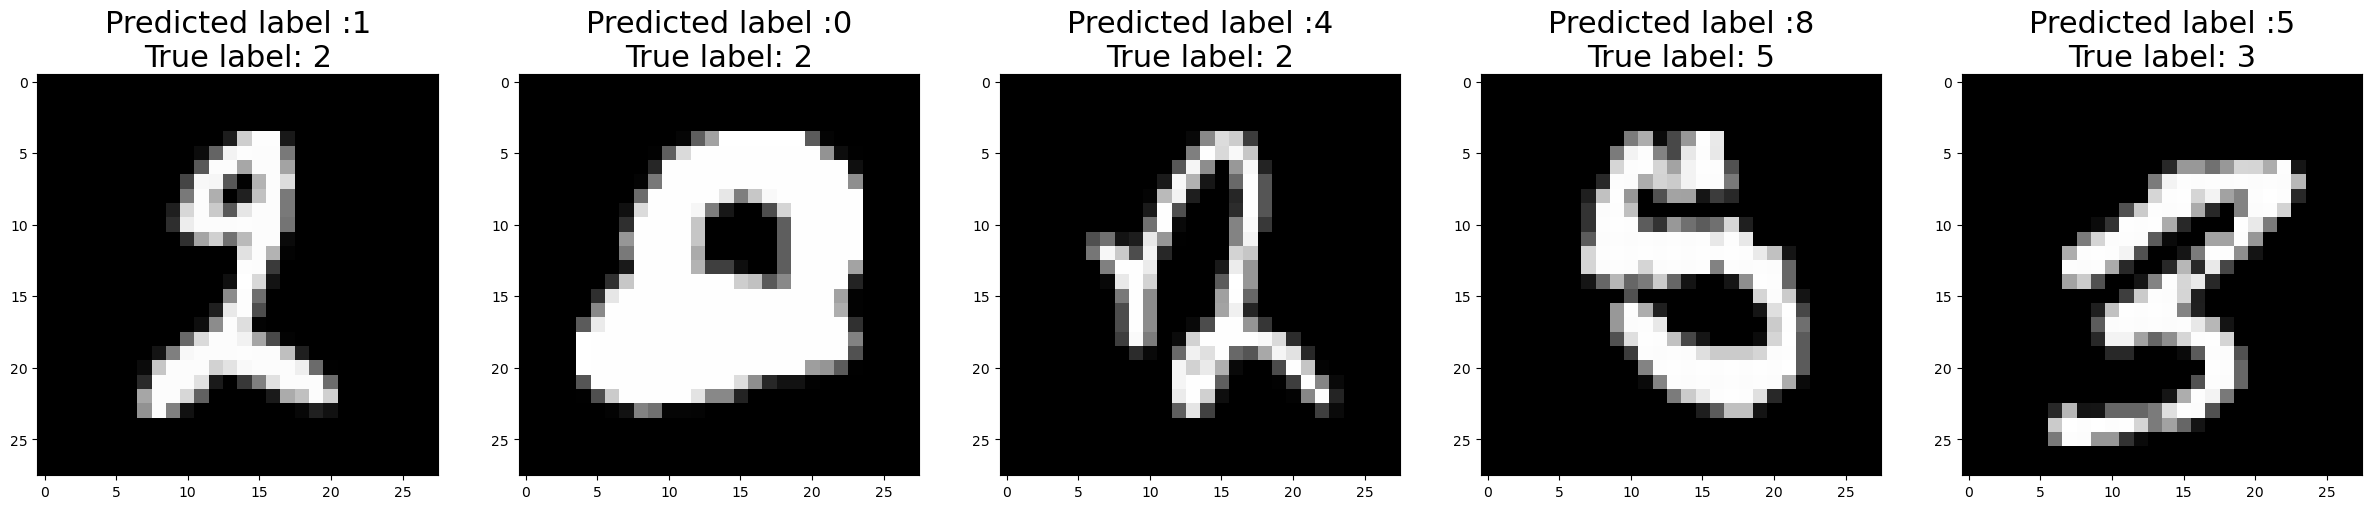

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

num_classes=10
f,ax = plt.subplots(1,num_classes,figsize=(20,20))

for i in range(0,num_classes):
  sample=x_train[y_train==i][0]
  ax[i].imshow(sample,cmap='gray')
  ax[i].set_title("Label: ()".format(i),fontsize=16)
 
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test= keras.utils.to_categorical(y_test,num_classes)

#normalizing data
x_train=x_train/255.0
x_text=x_test/255.0

#reshape data
x_train[0].shape
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)

#Creating model
model= Sequential()

model.add(Dense(units=128,input_shape=(784,),activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

#TRAIN
batch_size=512
epochs=10
model.fit(x=x_train,y=y_train,batch_size=batch_size,epochs=epochs)

#EVALUATE
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss,test_acc))
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred_classes)

#CHECKING WITH RANDOM EXAMPLE
random_idx=np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true=np.argmax(y_test,axis=1)
y_sample_true=y_true[random_idx]
y_sample_pred_class=y_pred_classes[random_idx]

plt.title("Predicted {},True {}".format(y_sample_pred_class,y_sample_true),fontsize=16)
plt.imshow(x_sample.reshape(28,28),cmap='gray')

#CONFUSION MATRIX
confusion_mtx=confusion_matrix(y_true,y_pred_classes)
#Plot
fig,ax=plt.subplots(figsize=(15,16))
ax=sns.heatmap(confusion_mtx,annot=True,fmt='d',ax=ax,cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

#ERROR CHECKING
errors=(y_pred_classes - y_true!=0)
y_pred_classes_errors=y_pred_classes[errors]
y_pred_errors=y_pred[errors]
y_true_errors=y_true[errors]
x_test_errors=x_test[errors]
y_pred_errors_probability=np.max(y_pred_errors,axis=1)
true_probability_errors=np.diagonal(np.take(y_pred_errors,y_true_errors,axis=1 ))
diff_errors_pred_true=y_pred_errors_probability-true_probability_errors
#Get the list of indices of sorted differences
sorted_idx_diff_errors=np.argsort(diff_errors_pred_true)
top_idx_diff_errors=sorted_idx_diff_errors[-5:]
#show Top errors
num=len(top_idx_diff_errors)
f,ax=plt.subplots(1,num,figsize=(30,30))

for i in range(0,num):
  idx=top_idx_diff_errors[i]
  sample=x_test_errors[idx].reshape(28,28)
  y_t=y_true_errors[idx]
  y_p=y_pred_classes_errors[idx]
  ax[i].imshow(sample,cmap='gray')
  ax[i].set_title('Predicted label :{}\nTrue label: {}'.format(y_p,y_t),fontsize=22)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
np.random.seed(0)

In [5]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


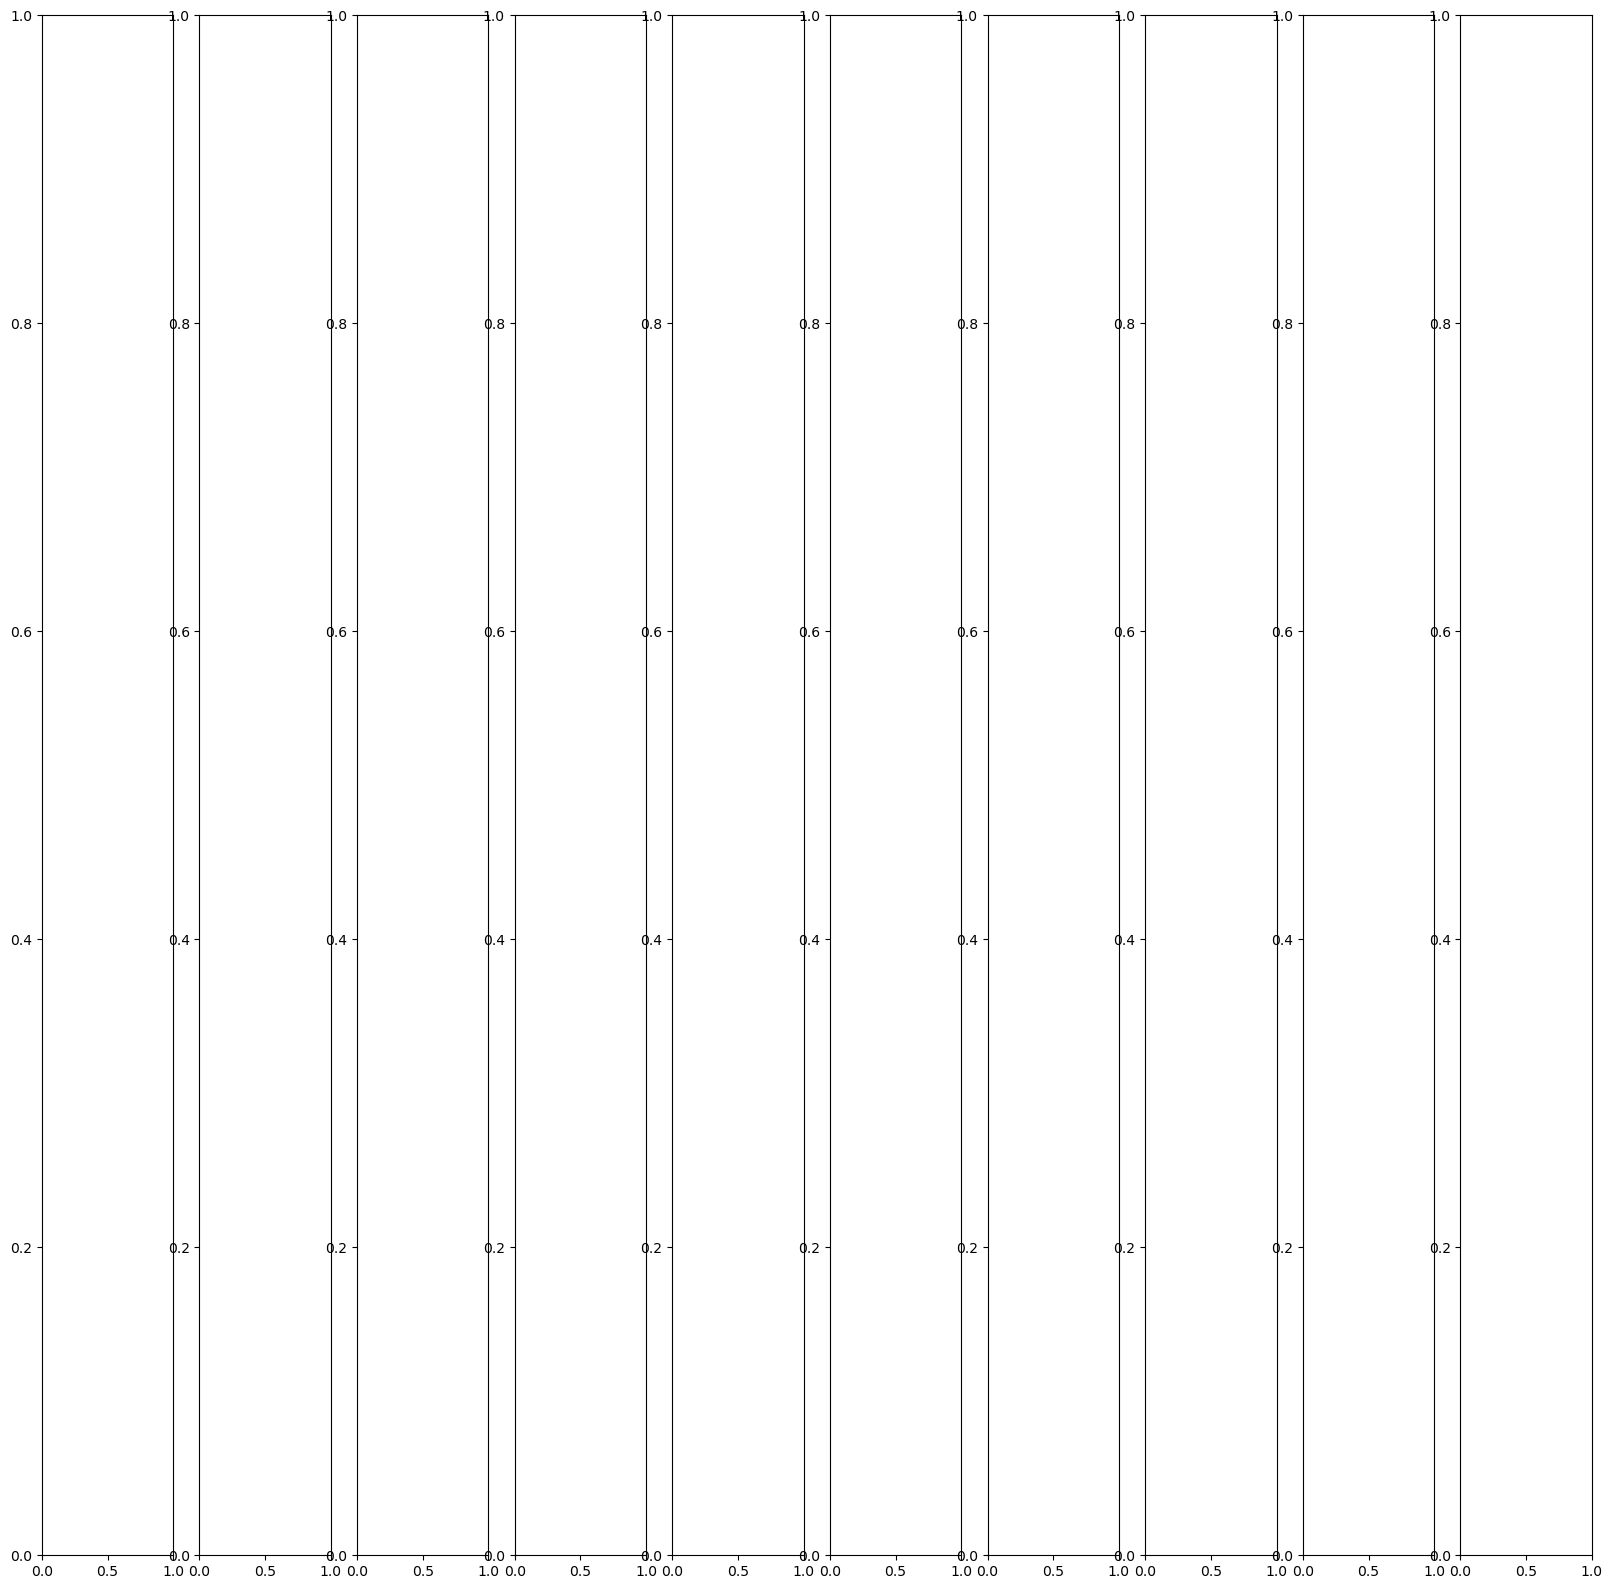

In [7]:
num_classes=10
f,ax = plt.subplots(1,num_classes,figsize=(20,20))


In [8]:
for i in range(0,num_classes):
    sample=x_train[y_train==i][0]
    ax[i].imshow(sample,cmap='gray')
    ax[i].set_title("Label: ()".format(i),fontsize=16)

In [9]:
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test= keras.utils.to_categorical(y_test,num_classes)


In [10]:
x_train=x_train/255.0
x_text=x_test/255.0

In [11]:
x_train[0].shape
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)

(60000, 784)


In [12]:
model= Sequential()

model.add(Dense(units=128,input_shape=(784,),activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [13]:
batch_size=512
epochs=10
model.fit(x=x_train,y=y_train,batch_size=batch_size,epochs=epochs)

Epoch 1/10
118/118 [==============================] - 1s 4ms/step - loss: 0.6260 - accuracy: 0.8190
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 0.2343 - accuracy: 0.9323
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1757 - accuracy: 0.9493
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1410 - accuracy: 0.9592
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1160 - accuracy: 0.9658
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0994 - accuracy: 0.9710
Epoch 7/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0869 - accuracy: 0.9737
Epoch 8/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0759 - accuracy: 0.9768
Epoch 9/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0676 - accuracy: 0.9791
Epoch 10/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0593 - accuracy: 0.9817

In [14]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss,test_acc))
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 0s 921us/step - loss: 12.9504 - accuracy: 0.9763
Test Loss: 12.950374603271484, Test Accuracy: 0.9763000011444092
313/313 [==============================] - 0s 819us/step
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[7 2 1 ... 4 5 6]


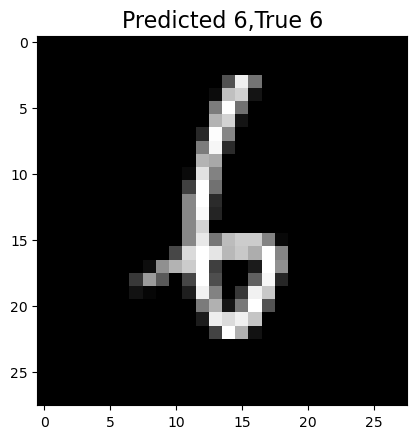

In [15]:
random_idx=np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true=np.argmax(y_test,axis=1)
y_sample_true=y_true[random_idx]
y_sample_pred_class=y_pred_classes[random_idx]

plt.title("Predicted {},True {}".format(y_sample_pred_class,y_sample_true),fontsize=16)
plt.imshow(x_sample.reshape(28,28),cmap='gray')


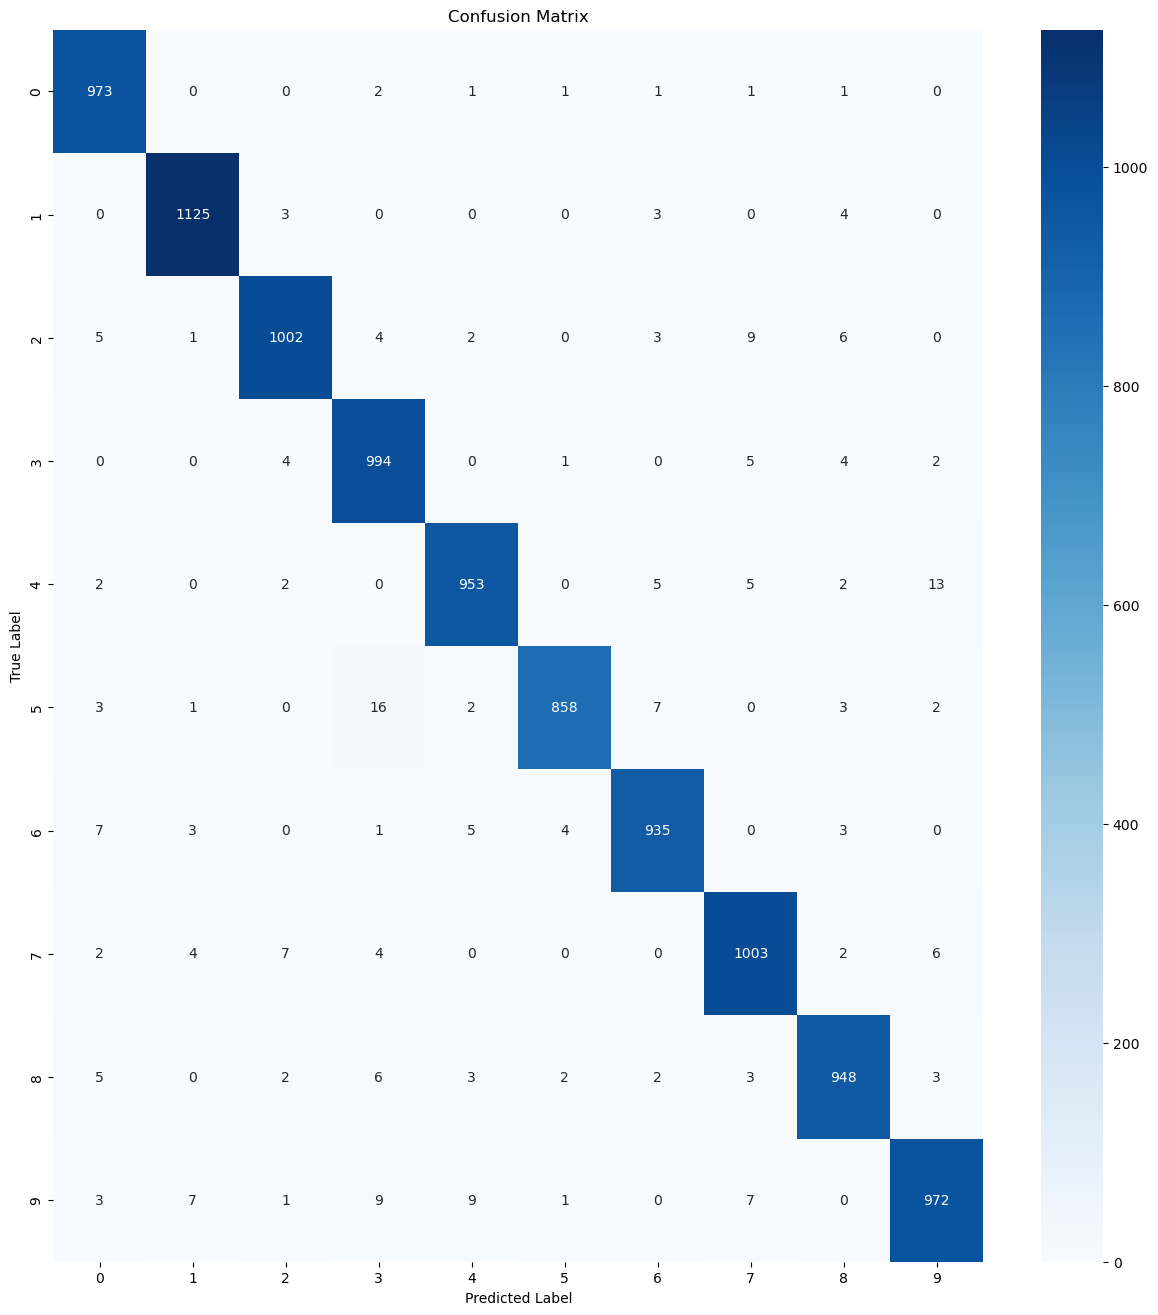

In [16]:
confusion_mtx=confusion_matrix(y_true,y_pred_classes)
#Plot
fig,ax=plt.subplots(figsize=(15,16))
ax=sns.heatmap(confusion_mtx,annot=True,fmt='d',ax=ax,cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

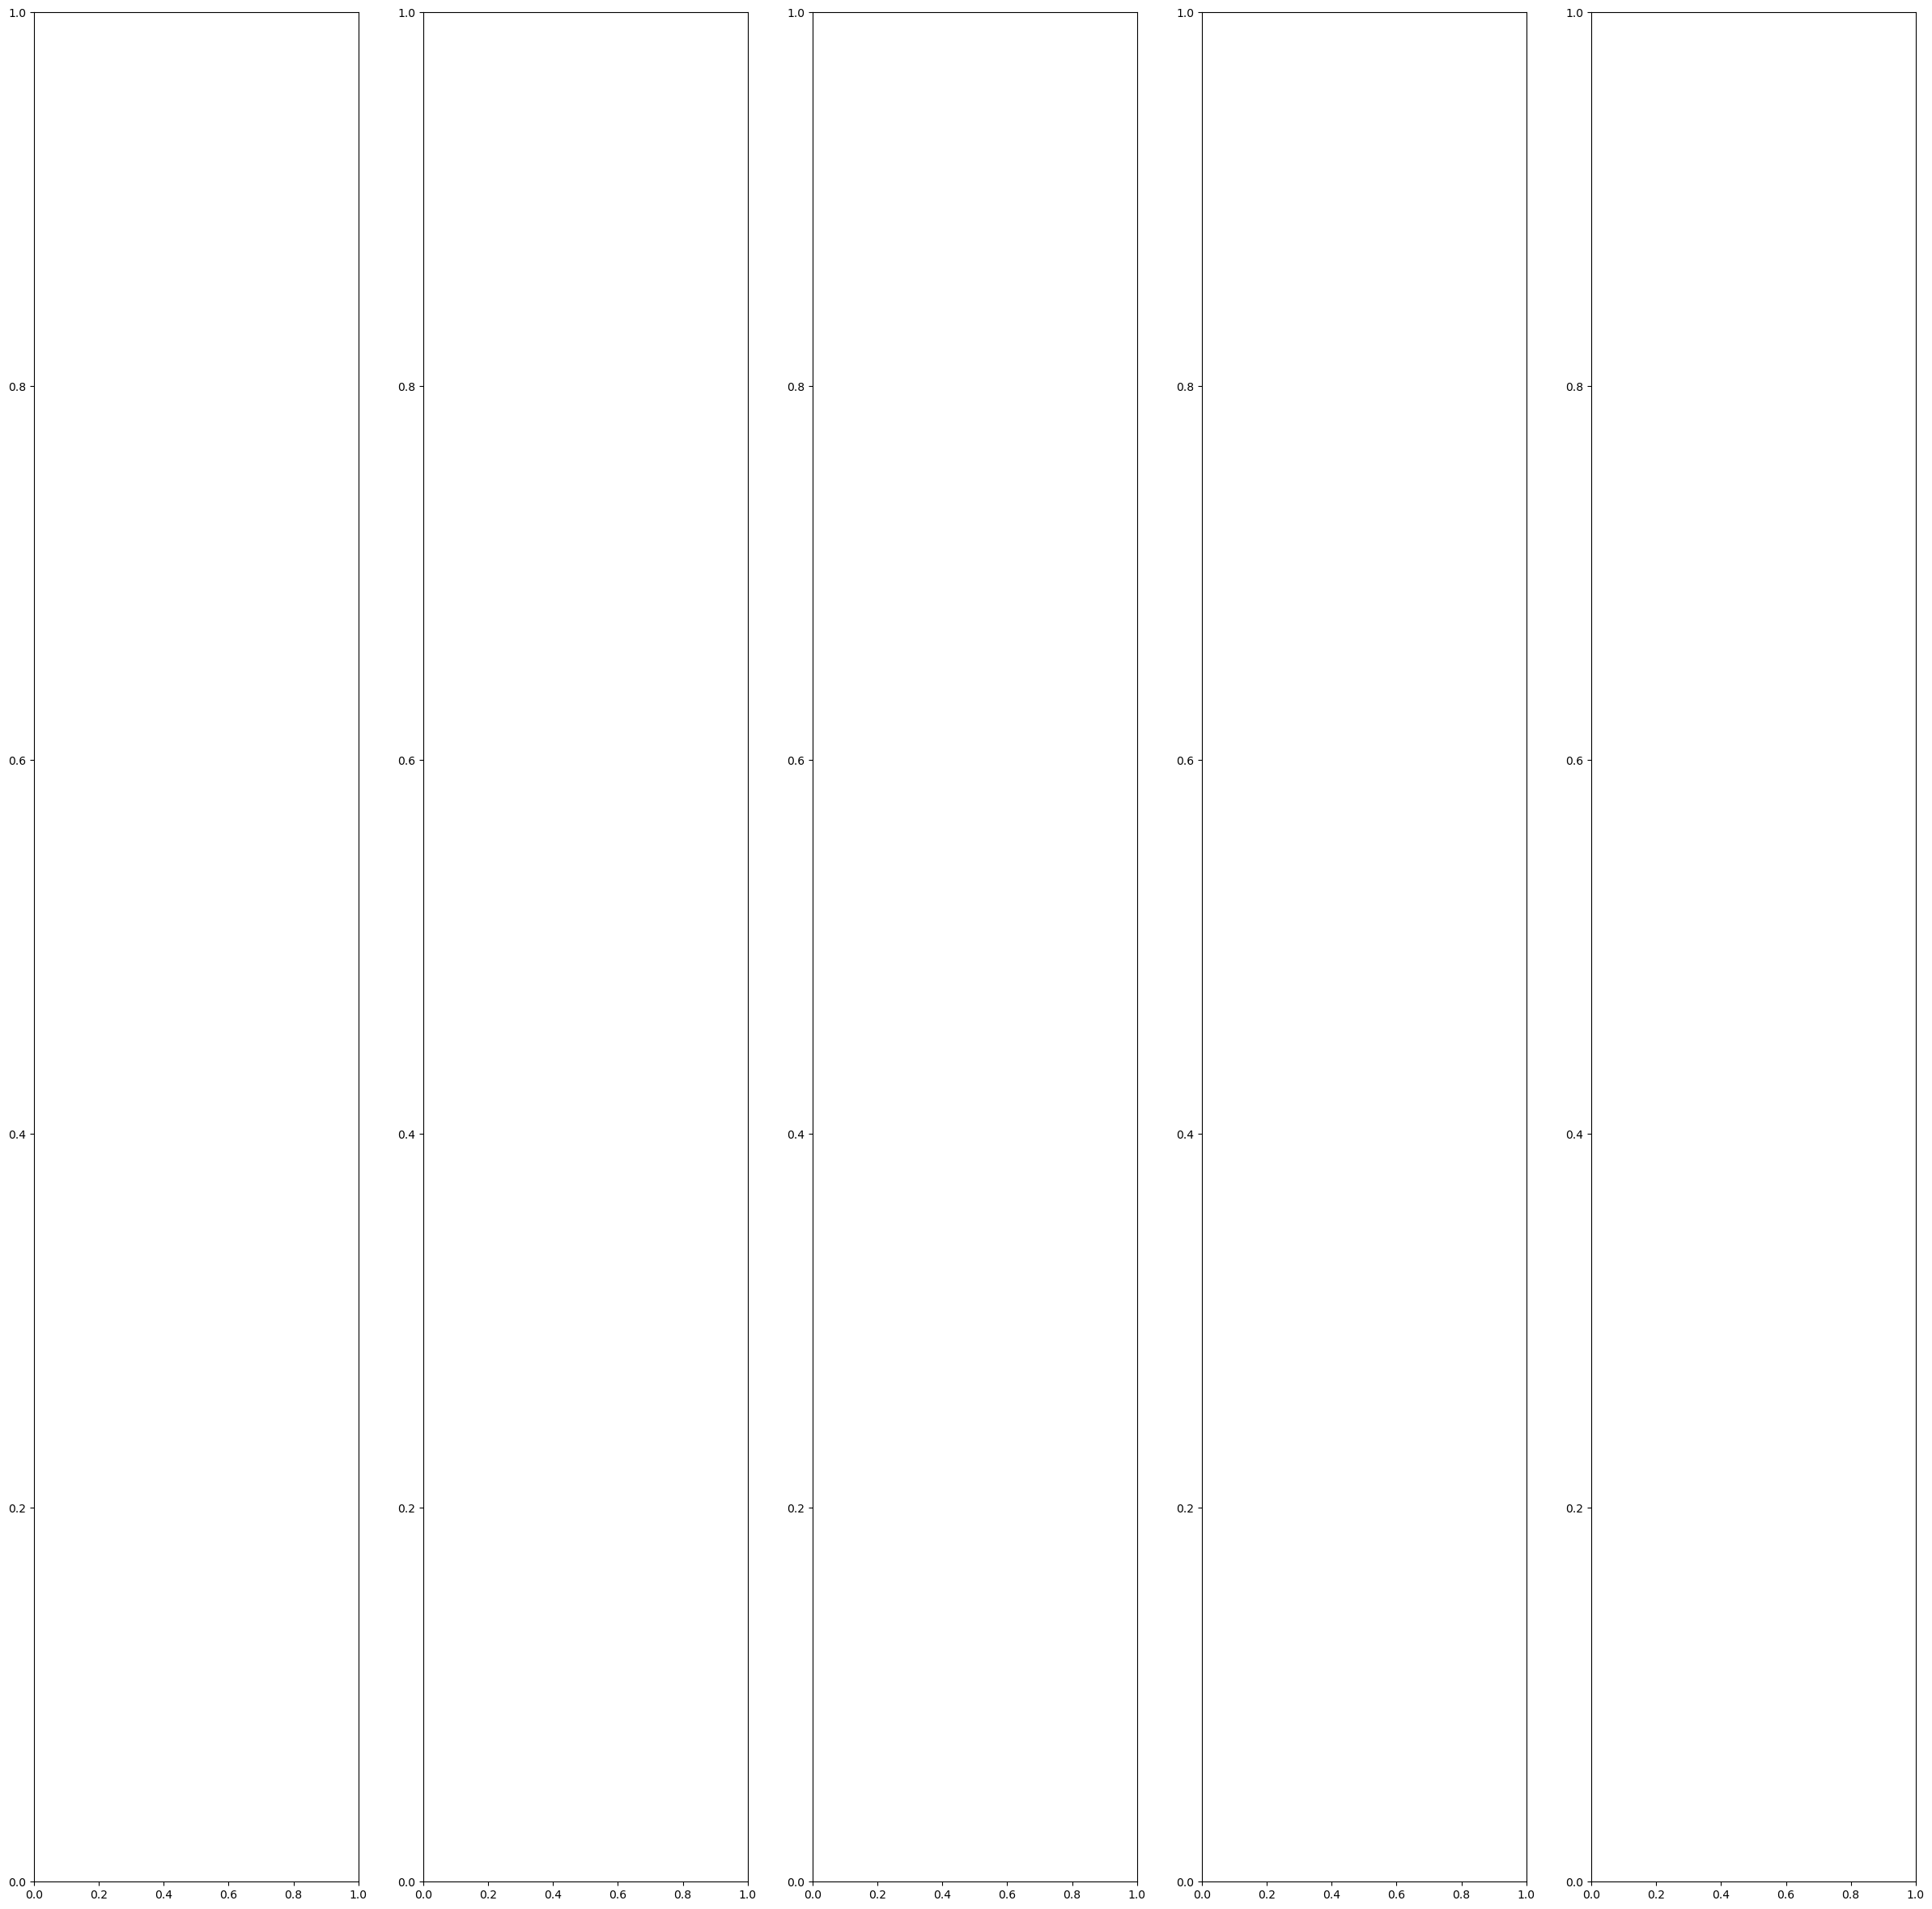

In [17]:
errors=(y_pred_classes - y_true!=0)
y_pred_classes_errors=y_pred_classes[errors]
y_pred_errors=y_pred[errors]
y_true_errors=y_true[errors]
x_test_errors=x_test[errors]
y_pred_errors_probability=np.max(y_pred_errors,axis=1)
true_probability_errors=np.diagonal(np.take(y_pred_errors,y_true_errors,axis=1 ))
diff_errors_pred_true=y_pred_errors_probability-true_probability_errors
#Get the list of indices of sorted differences
sorted_idx_diff_errors=np.argsort(diff_errors_pred_true)
top_idx_diff_errors=sorted_idx_diff_errors[-5:]
#show Top errors
num=len(top_idx_diff_errors)
f,ax=plt.subplots(1,num,figsize=(30,30))

In [18]:
for i in range(0,num):
    idx=top_idx_diff_errors[i]
    sample=x_test_errors[idx].reshape(28,28)
    y_t=y_true_errors[idx]
    y_p=y_pred_classes_errors[idx]
    ax[i].imshow(sample,cmap='gray')
    ax[i].set_title('Predicted label :{}\nTrue label: {}'.format(y_p,y_t),fontsize=22)